In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import random
import os
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

sns.set_theme()
sns.set_context("notebook")
sns.set_palette("colorblind")

In [2]:
data_path = '../data/'

# Multi Class Survival Analysis: Predefined Risks Categories

In [3]:
pub_mult_group = 'BernardEtAl/'

path_verylow = data_path+pub_mult_group+'veryLow.tsv'
df_verylow = pd.read_csv(path_verylow, sep='\t')
path_low = data_path+pub_mult_group+'low.tsv'
df_low = pd.read_csv(path_low, sep='\t')
path_int = data_path+pub_mult_group+'int.tsv'
df_int = pd.read_csv(path_int, sep='\t')
path_high = data_path+pub_mult_group+'high.tsv'
df_high = pd.read_csv(path_high, sep='\t')
path_veryhigh = data_path+pub_mult_group+'veryHigh.tsv'
df_veryhigh = pd.read_csv(path_veryhigh, sep='\t')

In [4]:
# Add a column with the risk group to each of the dataframes
df_verylow['Risk Group'] = 'Very Low'
df_low['Risk Group'] = 'Low'
df_int['Risk Group'] = 'Intermediate'
df_high['Risk Group'] = 'High'
df_veryhigh['Risk Group'] = 'Very High'

#print the length of each dataframe
print(len(df_verylow))
print(len(df_low))
print(len(df_int))
print(len(df_high))
print(len(df_veryhigh))

# Concatenate the dataframes
df_multiclass_survival = pd.concat([df_verylow, df_low, df_int, df_high, df_veryhigh])

482
1086
632
440
360


In [5]:
# map censored values to 0 and decesead values to 1
df_multiclass_survival['Status'] = df_multiclass_survival['Status'].map({'censored': 0, 'deceased': 1})

df_multiclass_survival

,Case ID,Study ID,Number at Risk,Status,Survival Rate,Time (months),Risk Group
0,E-H-117419,mds_iwg_2022,482,0,1.000000,0.000000,Very Low
1,E-H-105850,mds_iwg_2022,481,0,1.000000,0.000000,Very Low
2,E-H-105880,mds_iwg_2022,480,0,1.000000,0.000000,Very Low
3,E-H-110409,mds_iwg_2022,479,0,1.000000,0.000000,Very Low
4,E-H-110822,mds_iwg_2022,478,0,1.000000,0.000000,Very Low
...,...,...,...,...,...,...,...
355,E-H-105678,mds_iwg_2022,5,0,0.058110,77.786301,Very High
356,E-H-116517,mds_iwg_2022,4,1,0.043582,79.923288,Very High
357,E-H-105691,mds_iwg_2022,3,0,0.043582,97.380822,Very High
358,E-H-105650,mds_iwg_2022,2,0,0.043582,129.665753,Very High


In [6]:
kmf = KaplanMeierFitter()

In [7]:
T = df_multiclass_survival['Time (months)']
E = df_multiclass_survival['Status']

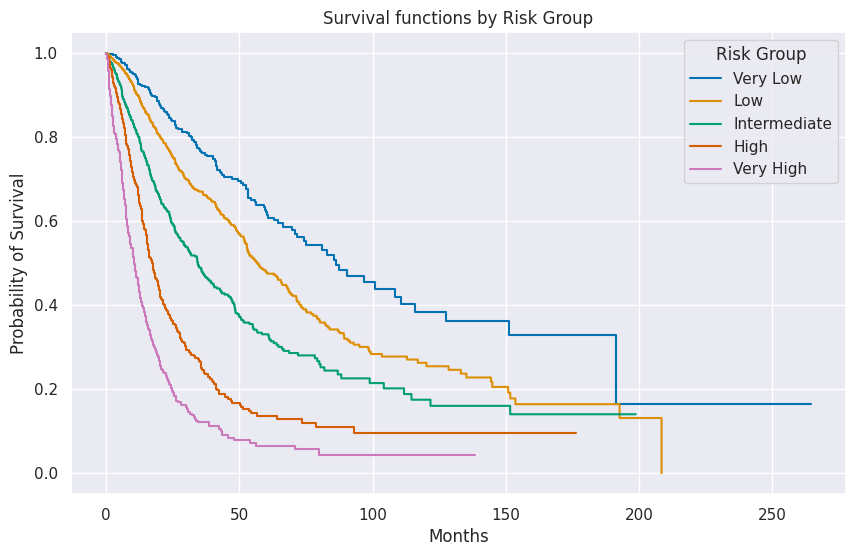

In [8]:
kmf = KaplanMeierFitter()

# Get the unique risk groups
risks_types = df_multiclass_survival['Risk Group'].unique()

# Prepare the plot
plt.figure(figsize=(10, 6))  # Set a figure size

# Loop through each risk group
for risk_type in risks_types:
    # Select data for the current risk group
    ix = df_multiclass_survival['Risk Group'] == risk_type
    # Fit the Kaplan-Meier model
    kmf.fit(T[ix], E[ix], label=risk_type)
    # Plot the survival function for the current group
    kmf.plot_survival_function(ci_show=False)

# Customize the plot
plt.title('Survival functions by Risk Group')
plt.xlabel('Months')
plt.ylabel('Probability of Survival')
plt.legend(title='Risk Group')

# Show the plot
plt.show()

In [9]:
pub_mult_group = 'ZehirEtAl/'

path_bladder = data_path+pub_mult_group+'bladder.tsv'
df_bladder = pd.read_csv(path_bladder, sep='\t')
path_breast = data_path+pub_mult_group+'breast.tsv'
df_breast = pd.read_csv(path_low, sep='\t')
path_melanoma = data_path+pub_mult_group+'melanoma.tsv'
df_melanoma = pd.read_csv(path_int, sep='\t')
path_thyroid = data_path+pub_mult_group+'thyroid.tsv'
df_thyroid = pd.read_csv(path_high, sep='\t')

In [10]:
for i in [df_bladder, df_breast, df_melanoma, df_thyroid]:
    i['Status'] = i['Status'].map({'censored': 0, 'deceased': 1})

# Add a column with the risk group to each of the dataframes
df_bladder['Cancer Group'] = 'Bladder'
df_breast['Cancer Group'] = 'Breast'
df_melanoma['Cancer Group'] = 'Melanoma'
df_thyroid['Cancer Group'] = 'Thyroid'

#print the leght of each dataframe
print(len(df_bladder), len(df_breast), len(df_melanoma), len(df_thyroid))


# Concatenate the dataframes
df_multiclass_survival = pd.concat([df_bladder, df_breast, df_melanoma, df_thyroid])

251 1086 632 440


In [11]:
kmf = KaplanMeierFitter()

T = df_multiclass_survival['Time (months)']
E = df_multiclass_survival['Status']

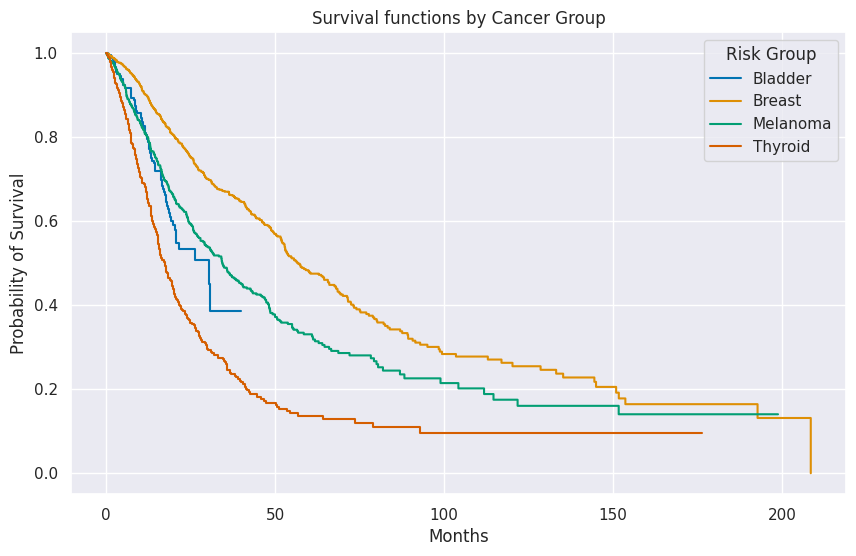

In [12]:
kmf = KaplanMeierFitter()

# Get the unique risk groups
risks_types = df_multiclass_survival['Cancer Group'].unique()

# Prepare the plot
plt.figure(figsize=(10, 6))  # Set a figure size

median_survival_time_real = []
average_survival_time_real = []
variance_survival_time_real = []

# Loop through each risk group
for risk_type in risks_types:
    # Select data for the current risk group
    ix = df_multiclass_survival['Cancer Group'] == risk_type
    # Fit the Kaplan-Meier model
    kmf.fit(T[ix], E[ix], label=risk_type)
    # Plot the survival function for the current group
    kmf.plot_survival_function(ci_show=False)
    median_survival_time_real.append(kmf.median_survival_time_)
    average_survival_time_real.append(kmf.survival_function_.mean())
    variance_survival_time_real.append(kmf.survival_function_.var())

# Customize the plot
plt.title('Survival functions by Cancer Group')
plt.xlabel('Months')
plt.ylabel('Probability of Survival')
plt.legend(title='Risk Group')

# Show the plot
plt.show()

# $\varepsilon$-DP Obfuscation Method

In [13]:
def revised_coin_toss(category, list_of_uniques, n, p):

    '''
    category: IPSS-R category, value to be privatized
    n: number of categories (not used in this function, used to compute the epsilon)
    p: coin bias
    '''
    # check if the possible epsilon is negative
    def verify_epsilon(p,n):
        return np.log((n*p+1-p)/(n-1-n*p+p))
        if epsilon <= 0:
            print('epsilon is negative for such values of p and n')
            exit()
        else:
            return epsilon
    
    # compute epsilon
    epsilon = verify_epsilon(p,n)

    # toss a coin H with probability p, T with probability 1-p
    coin = np.random.choice(['H', 'T'], p=[p, 1-p])

    # if coin is H, return the original value
    if coin == 'H':
        return category
    
    # if coin is T, return a random value from the n categories
    else:
        return random.choice(list_of_uniques)


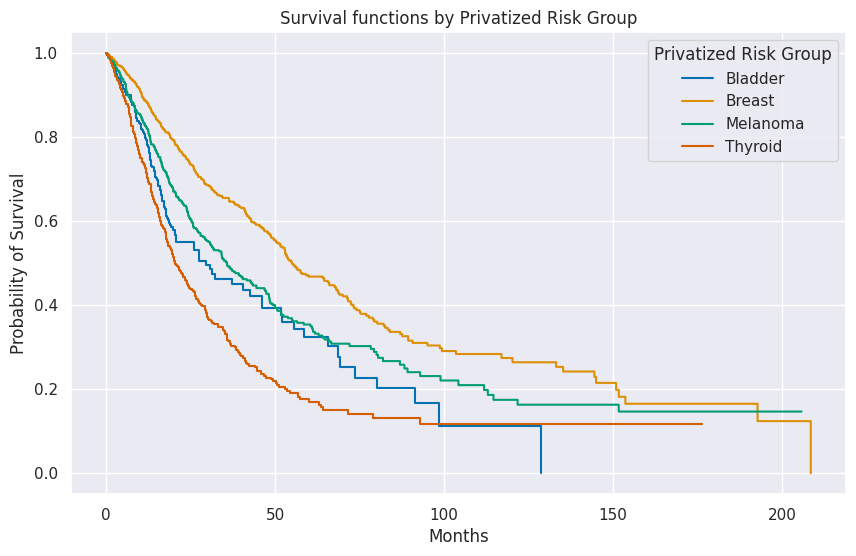

The epsilon for the privatized data is:  1.7346010553881066


In [14]:
# set the coin bias
p_1 = 0.8
n = len(risks_types)
e1 = np.log((n*p_1+1-p_1)/(n-1-n*p_1+p_1))
# privatize the IPSS-R category
df_multiclass_survival['Privatized Cancer Group'] = df_multiclass_survival['Cancer Group'].apply(lambda x: revised_coin_toss(x, risks_types, 4, p_1))


kmf = KaplanMeierFitter()

T = df_multiclass_survival['Time (months)']
E = df_multiclass_survival['Status']

# Prepare the plot
plt.figure(figsize=(10, 6))  # Set a figure size

median_survival_time_dp = []
average_survival_time_dp = []
variance_survival_time_dp = []

# Loop through each risk group
for risk_type in risks_types:
    # Select data for the current risk group
    ix = df_multiclass_survival['Privatized Cancer Group'] == risk_type
    # Fit the Kaplan-Meier model
    kmf.fit(T[ix], E[ix], label=risk_type)
    # Plot the survival function for the current group
    kmf.plot_survival_function(ci_show=False)
    median_survival_time_dp.append(kmf.median_survival_time_)
    average_survival_time_dp.append(kmf.survival_function_.mean())
    variance_survival_time_dp.append(kmf.survival_function_.var())

# Customize the plot
plt.title('Survival functions by Privatized Risk Group')
plt.xlabel('Months')
plt.ylabel('Probability of Survival')
#sort the legend
plt.legend(title='Privatized Risk Group', loc='best')

# Show the plot
plt.show()

print('The epsilon for the privatized data is: ', e1)


In [15]:
#parse the list of average survival times so that only the numeric values are left
average_survival_time_real = [x._values[0] for x in average_survival_time_real]
average_survival_time_dp = [x._values[0] for x in average_survival_time_dp]

#parse the list of variance survival times so that only the numeric values are left
variance_survival_time_real = [x._values[0] for x in variance_survival_time_real]
variance_survival_time_dp = [x._values[0] for x in variance_survival_time_dp]

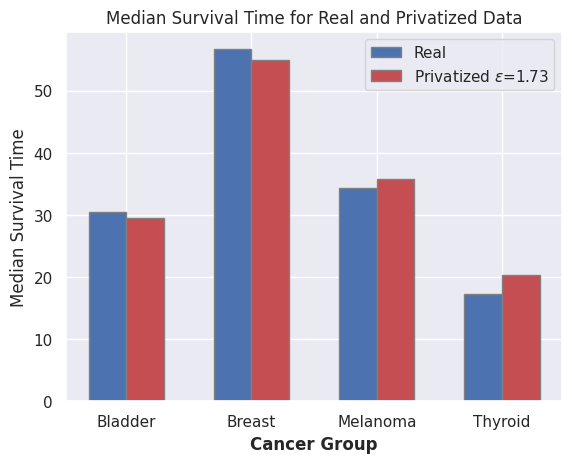

In [16]:
#plot a barplot with the median survival time for the real and privatized data
fig, ax = plt.subplots()
barWidth = 0.3
bars1 = median_survival_time_real
bars2 = median_survival_time_dp
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='grey', label='Real')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='grey', label=r'Privatized $\varepsilon$=' + f'{e1:.2f}')

plt.xlabel('Cancer Group', fontweight='bold')
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], risks_types)
plt.ylabel('Median Survival Time')
plt.title('Median Survival Time for Real and Privatized Data')
plt.legend()
plt.show()

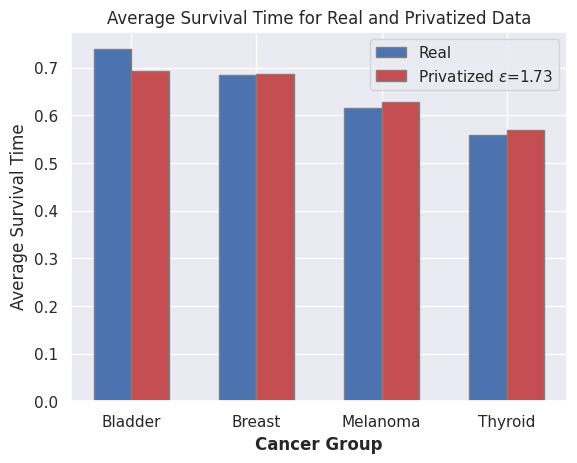

In [17]:
#plot a barplot with the average survival time for the real and privatized data
fig, ax = plt.subplots()
barWidth = 0.3
bars1 = average_survival_time_real
bars2 = average_survival_time_dp
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='grey', label='Real')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='grey', label=r'Privatized $\varepsilon$=' + f'{e1:.2f}')

plt.xlabel('Cancer Group', fontweight='bold')
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], risks_types)
plt.ylabel('Average Survival Time')
plt.title('Average Survival Time for Real and Privatized Data')
plt.legend()
plt.show()

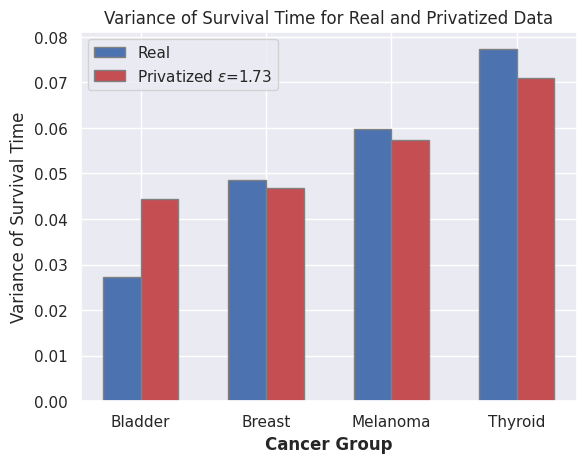

In [18]:
#plot a barplot with the variance of the survival time for the real and privatized data
fig, ax = plt.subplots()
barWidth = 0.3
bars1 = variance_survival_time_real
bars2 = variance_survival_time_dp

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='grey', label='Real')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='grey', label=r'Privatized $\varepsilon$=' + f'{e1:.2f}')

plt.xlabel('Cancer Group', fontweight='bold')
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], risks_types)
plt.ylabel('Variance of Survival Time')
plt.title('Variance of Survival Time for Real and Privatized Data')
plt.legend()
plt.show()

In [19]:
#compare the logrank test for the original and privatized data
results = logrank_test(df_multiclass_survival['Time (months)'][df_multiclass_survival['Privatized Cancer Group'] == 'Bladder'],
                          df_multiclass_survival['Time (months)'][df_multiclass_survival['Privatized Cancer Group'] == 'Breast'],
                          df_multiclass_survival['Status'][df_multiclass_survival['Privatized Cancer Group'] == 'Bladder'],
                          df_multiclass_survival['Status'][df_multiclass_survival['Privatized Cancer Group'] == 'Breast'])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          38.44 <0.005     30.73